<a href="https://colab.research.google.com/github/Haeune-Jeon/CV/blob/main/2_%EC%A3%BC%EC%9A%94_CNN_%EC%95%84%ED%82%A4%ED%85%8D%EC%B3%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)   #(60000, 28, 28)
print(test_images.shape)    #(10000, 28,28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
import numpy as np

train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2))).reshape((60000, 32, 32, 1))
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2))).reshape((10000, 32, 32, 1))

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

print(train_images.shape)
print(test_images.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
print(train_labels[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

#C1. 합성곱 계층
model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), activation='sigmoid', input_shape=(32, 32, 1), padding='valid'))

#S2. 평균 풀링
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))

#C3. 합성곱 계층
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), activation='sigmoid', padding='valid'))

#S4. 평균 풀링
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=2))

#C5. 120개의 5*5 필터를 사용하여 완전연결계층으로 연결되는 합성곱 계층. 결과는 1*1
model.add(layers.Conv2D(filters=120, kernel_size=(5, 5), activation='sigmoid', padding='valid'))

#(1,1,120)의 3차원을 한 개 차원으로 reshape
model.add(layers.Reshape((120,)))

#F6. 완전연결층
model.add(layers.Dense(units=84, activation='sigmoid'))

#분류를 위해 소프트맥스 활성화 함수를 갖는 완전연결층
model.add(layers.Dense(units=10, activation='softmax'))

# 모델 요약
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - acc: 0.2760 - loss: 2.0167 - val_acc: 0.8589 - val_loss: 0.5023
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.8769 - loss: 0.4270 - val_acc: 0.9197 - val_loss: 0.2659
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9233 - loss: 0.2587 - val_acc: 0.9378 - val_loss: 0.2026
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9410 - loss: 0.1973 - val_acc: 0.9507 - val_loss: 0.1633
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9524 - loss: 0.1583 - val_acc: 0.9607 - val_loss: 0.1264
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9602 - loss: 0.1290 - val_acc: 0.9627 - val_loss: 0.1203
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9650 - loss: 0.1128 - val_acc: 0.9718 - val_loss: 0.0930
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9706 - loss: 0.0947 - val_acc: 0.9744 - val_loss: 0.0847
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9783 - loss: 0.0708
test_acc: 0.9810000061988831


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc) +1)

Accuracy of each epoch: [0.5270666480064392, 0.8949000239372253, 0.927483320236206, 0.9431833624839783, 0.9539499878883362, 0.9613166451454163, 0.967199981212616, 0.9715666770935059, 0.9754666686058044, 0.9782500267028809]


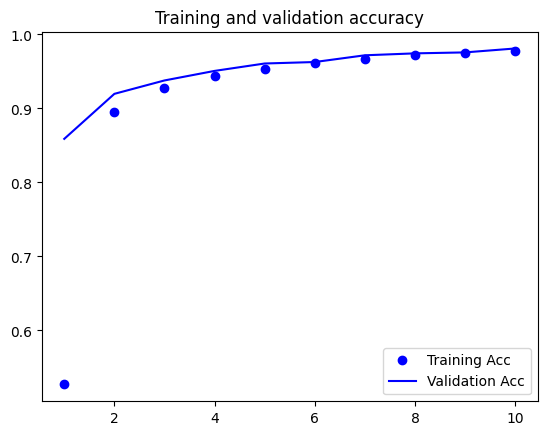

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

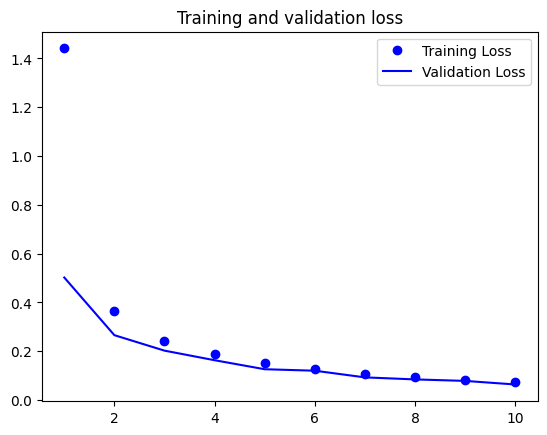

In [ ]:
plt. figure()   # 이전 내용을 지우고 새로 그림을 그릴 준비 (앞에 validation accuracy 그래프 그린거 지워야 하니까)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
import numpy as np

sample = np.random.choice(np.arange(0, len(test_images)))   #random.choice : 랜덤으로 이미지 하나를 선택해줌
print(sample)

print(test_labels[sample])

558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
# 슬라이싱으로 한 개 이미지를 (1, 32, 32,1)로 가져온다 (slicing - 차원유지 / indexing - 차원이 하나 줄어듦), (batch_size, height, width, channel)
predictions = model.predict(test_images[sample:sample+1, :, :, :])

print("predictions:", predictions)

#가장 큰 확률의 인덱스
predicted_class = np.argmax(predictions, axis=1)[0]
print("예측된 숫자:", predicted_class)

#클래스별 확률
print("\n클래스별 확률:")
for i, prob in enumerate(predictions[0]):
  print(f"Class{i}:{prob:4f}")  #4f : 소수점 4째자리까지만 출력

  # 결과값에서, e뒷분인 지수가 가장 작은 것이 가장 큰 수가 됨

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predictions: [[7.4092322e-06 3.7920327e-06 2.1548935e-06 1.2531670e-04 8.1751129e-04
  1.4750884e-04 3.8402057e-08 4.2829217e-04 4.0731239e-04 9.9806064e-01]]
예측된 숫자: 9

클래스별 확률:
Class0:0.000007
Class1:0.000004
Class2:0.000002
Class3:0.000125
Class4:0.000818
Class5:0.000148
Class6:0.000000
Class7:0.000428
Class8:0.000407
Class9:0.998061


예측된 숫자: 9
(32, 32, 1)
<class 'numpy.ndarray'>


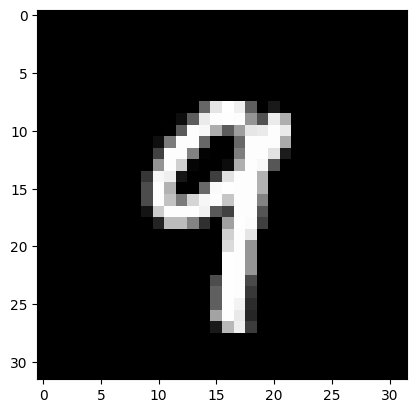

In [ ]:
import matplotlib.pyplot as plt

print("예측된 숫자:", predicted_class)
print(test_images[sample].shape)
print(type(test_images[sample]))

#흑백 이미지로 출력
plt.imshow(test_images[sample], cmap='gray')  #camp : color map
plt.show()

## AlexNet

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# 샘플링 비율 설정 (10%)
sampling_ratio = 0.1  #10%의 데이터만 가지고 진행

# 훈련 데이터 샘플링
num_samples = int(len(X_train) * sampling_ratio)
indices = np.random.choice(len(X_train), num_samples, replace=False)  # replace=Flase : 비복원추출
X_train_sampled = X_train[indices]
y_train_sampled = y_train[indices]

In [ ]:
num_samples_test = int(len(X_test)*sampling_ratio)
indices_test = np.random.choice(len(X_test), num_samples_test, replace=False)
X_test_sampled = X_test[indices_test]
y_test_sampled = y_test[indices_test]

In [ ]:
import tensorflow as tf

X_train_resized = tf.image.resize(X_train_sampled,[224,224])  #본래 데이터 크기인 (32,32)을 AlexNet이 사용한 (224,224)로 바꿈
X_test_resized = tf.image.resize(X_test_sampled,[224,224])

In [ ]:
train_images = X_train_resized / 225.0
test_images = X_test_resized / 255.0

print(train_images.shape)
print(test_images.shape)  #shape의 변화는 없음

(5000, 224, 224, 3)
(1000, 224, 224, 3)


In [ ]:
# 종속변수 확인
print(type(y_test_sampled))
print(y_test_sampled[:10])

# 변수명 변경
train_labels = y_train_sampled
test_labels = y_test_sampled

<class 'numpy.ndarray'>
[[7]
 [7]
 [9]
 [6]
 [8]
 [8]
 [6]
 [6]
 [9]
 [9]]


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

#합성곱 계층 1 - kernel_size와 stides로 인해 (224,224) -> (54,54)
model.add(layers.Conv2D(filters=96, kernel_size=(11, 11), strides=(4,4), activation='relu', input_shape=(224, 224,3), padding='valid'))

#합성곱 계층 2
model.add(layers.Conv2D(filters=256, kernel_size=(5, 5),  strides=(1,1), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

#합성곱 계층 3
model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# 합성곱 계층 4
model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid'))

#합성곱 계층 5
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='valid', strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))

#Flattening
model.add(layers.Flatten())

#완전연걸층 1
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

#완전연결층 2
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))  #dropout은 shape을 바꾸지 못함

#완전연결층 3 (Output Layer)
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
#모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 256)       614656    
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 256)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 384)       885120    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 384)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 384)         1

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

# 모델 훈련
# 데이터와 훈련량이 충분하지 않기 때문에 성능이 좋지 않다
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
79/79 [==============================] - 80s 997ms/step - loss: 2.3661 - acc: 0.1026 - val_loss: 2.3026 - val_acc: 0.1060
Epoch 2/10
79/79 [==============================] - 78s 982ms/step - loss: 2.3027 - acc: 0.1076 - val_loss: 2.3042 - val_acc: 0.1050
Epoch 3/10
79/79 [==============================] - 78s 981ms/step - loss: 2.3023 - acc: 0.1090 - val_loss: 2.3032 - val_acc: 0.1050
Epoch 4/10
79/79 [==============================] - 77s 979ms/step - loss: 2.3027 - acc: 0.1056 - val_loss: 2.3035 - val_acc: 0.1050
Epoch 5/10
79/79 [==============================] - 77s 979ms/step - loss: 2.3022 - acc: 0.1018 - val_loss: 2.3037 - val_acc: 0.1050
Epoch 6/10
79/79 [==============================] - 77s 979ms/step - loss: 2.3023 - acc: 0.1090 - val_loss: 2.3032 - val_acc: 0.1050
Epoch 7/10
79/79 [==============================] - 77s 979ms/step - loss: 2.3019 - acc: 0.1058 - val_loss: 2.3037 - val_acc: 0.1050
Epoch 8/10
79/79 [==============================] - 77s 979ms/step - 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

32/32 [==============================] - 3s 86ms/step - loss: 2.3034 - acc: 0.1050
test_acc: 0.10499999672174454


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuravy of each epoch:', acc)
epochs = range(1, len(acc)+1)

Accuravy of each epoch: [0.10260000079870224, 0.10760000348091125, 0.10899999737739563, 0.10559999942779541, 0.10180000215768814, 0.10899999737739563, 0.10580000281333923, 0.10540000349283218, 0.10819999873638153, 0.10419999808073044]


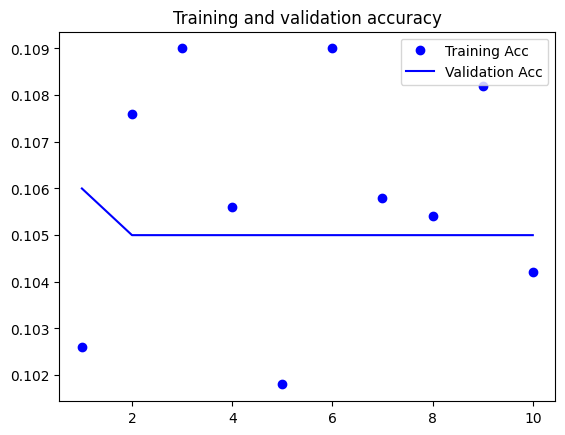

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

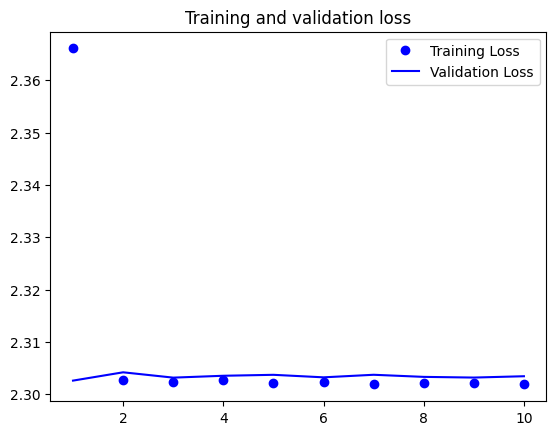

In [ ]:
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
import numpy as np
sample = np.random.choice(np.arange(0, len(test_images)))

print(sample)
print(test_labels[sample])

668
[7]


In [ ]:
predictions = model.predict(test_images[sample:sample+1])

predicted_class = np.argmax(predictions, axis=1)[0]
print("예측된 숫자:", predicted_class)

print("\n클래스별 확률:")
for i, prob in enumerate(predictions[0]):
  print(f"Class {i}: {prob:4f}")

1/1 [==============================] - 0s 154ms/step
예측된 숫자: 2

클래스별 확률:
Class 0: 0.100657
Class 1: 0.091670
Class 2: 0.107394
Class 3: 0.106777
Class 4: 0.096366
Class 5: 0.095465
Class 6: 0.102439
Class 7: 0.098707
Class 8: 0.099890
Class 9: 0.100634


In [ ]:
class_names = {
    0: "airplane",
    1: "atomobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

print(class_names[predicted_class])

bird


images shape: (224, 224, 3)
<class 'tensorflow.python.framework.ops.EagerTensor'>


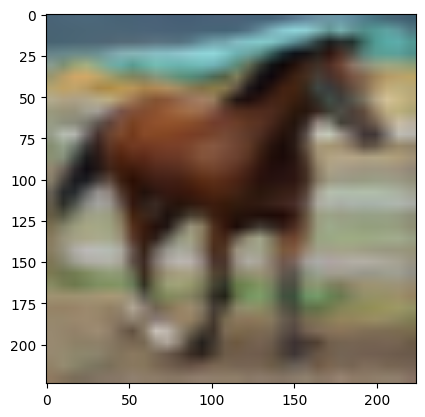

In [ ]:
import matplotlib.pyplot as plt

print("images shape:", test_images[sample].shape)
print(type(test_images[sample]))

#텐서도 출력 가능하지만, 안정적인 출력을 위해 넘파이 배열로 변환한다
plt.imshow(test_images[sample].numpy())
plt.show()

## VGG19

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# 샘플링 비율 설정 (10%)
sampling_ratio = 0.1

# 훈련 데이터 샘플링
num_samples = int(len(X_train)*sampling_ratio)
indices = np.random.choice(len(X_train), num_samples, replace=False)  #비복원추출
X_train_sampled = X_train[indices]  #5만개 중에서 임의로 5천개 선택
y_train_sampled = y_train[indices]  #5만개 중에서 임의로 5천개 선택

In [ ]:
# 태스트 데이터 샘플링
num_samples_test = int(len(X_test)*sampling_ratio)
indices_test = np.random.choice(len(X_test), num_samples_test, replace=False)
X_test_sampled = X_test[indices_test]
y_test_sampled = y_test[indices_test]

print("새로운 훈련 데이터 크기:", X_train_sampled.shape)
print("새로운 테스트 데이터 크기:", X_test_sampled.shape)

새로운 훈련 데이터 크기: (5000, 32, 32, 3)
새로운 테스트 데이터 크기: (1000, 32, 32, 3)


In [ ]:
# 이미지 리사이징

import tensorflow as tf

X_train_resized = tf.image.resize(X_train_sampled, [224, 224])
X_test_resized = tf.image.resize(X_test_sampled, [224, 224])

In [ ]:
# 정규화

train_images = X_train_resized / 225.0
test_images = X_test_resized / 225.0

print(train_images.shape)
print(test_images.shape)

(5000, 224, 224, 3)
(1000, 224, 224, 3)


In [ ]:
# 종속변수 확인 및 변수명 변경

# 종속변수 확인
print(type(y_test_sampled))
print(y_test_sampled[:10])

# 변수명 변경
train_labels = y_train_sampled
test_labels = y_test_sampled

<class 'numpy.ndarray'>
[[9]
 [2]
 [0]
 [1]
 [1]
 [9]
 [3]
 [8]
 [9]
 [8]]


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

# Block 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

# Block 4
model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

# Block 5
model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

#완전연결층
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout
model.add(layers.Dense(10, activation='softmax'))   # 본래 1000분류이나, DIFAR-10의 10분류로 수정

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

# 모델 훈련
# 데이터와 훈련량이 충분하지 않기 때문에 성능은 좋지 않다
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
79/79 [==============================] - 795s 10s/step - loss: 2.3053 - acc: 0.0980 - val_loss: 2.3048 - val_acc: 0.0880
Epoch 2/10
79/79 [==============================] - 784s 10s/step - loss: 2.3036 - acc: 0.0950 - val_loss: 2.3038 - val_acc: 0.0990
Epoch 3/10
79/79 [==============================] - 784s 10s/step - loss: 2.3032 - acc: 0.0932 - val_loss: 2.3033 - val_acc: 0.0990
Epoch 4/10
40/79 [==============>...............] - ETA: 6:21 - loss: 2.3030 - acc: 0.0918

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

In [ ]:
# 훈련 과정 확인
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc)+1)

In [ ]:
# 정확도 시각화
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()

In [ ]:
# 손실값 시각화
plt.figure()

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and validation loss")
plt.legend()

In [ ]:
# 한 개 이미지 예측

# 랜덤 한 개 이미지 추출
import numpy as np
sample = np.random.choice(np.arange(0, len(test_images)))

print(sample)
print(test_labels[sample])

In [ ]:
# 예측

# 모델을 사용해 예측 예측
predictions = model.predict(test_images[sample:sample+1])

# 가장 큰 확률의 인덱스
predicted_class = np.argmax(predictions, axis=1)[0]
print("예측된 숫자:", predicted_class)

# 클래스별 확률
print("\n클래스별 확률:")
for i, prob in enumerate(predictions[0]):
  print(f"Class {i}: {prob:4f}")

In [ ]:
class_names = {
    0: "airplane",
    1: "atomobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

print(class_names[predicted_class])

In [ ]:
import matplotlib.pyplot as plt

print("images shape:", test_images[sample].shape)
print(type(test_images[sample]))

#텐서도 출력 가능하지만, 안정적인 출력을 위해 넘파이 배열로 변환한다
plt.imshow(test_images[sample].numpy())
plt.show()

In [ ]:
# Keras의 VGG19 - Flatten ,Debse, Dropout 제외됨
from keras.applications.vgg19 import VGG19
vgg = VGG19(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
vgg.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              